In [2]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [30]:
hic = hm.hiCMatrix('./10kbp_raw_drosophila_trans_aggregate.h5')

In [26]:
hic.matrix

<11036x11036 sparse matrix of type '<class 'numpy.int64'>'
	with 88604956 stored elements in Compressed Sparse Row format>

In [31]:
hic.matrix

<11036x11036 sparse matrix of type '<class 'numpy.int64'>'
	with 88604956 stored elements in Compressed Sparse Row format>

In [28]:
hic.matrix.toarray().max()

41100

In [32]:
hic.matrix.toarray().max()

41100

In [29]:
!unzip 10kbp_raw_drosophila_trans_aggregate.h5.zip

Archive:  10kbp_raw_drosophila_trans_aggregate.h5.zip
  inflating: 10kbp_raw_drosophila_trans_aggregate.h5  
  inflating: __MACOSX/._10kbp_raw_drosophila_trans_aggregate.h5  


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_1.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_2.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_all.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//25kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_1.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//25kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_2.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//25kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_all.csv
/sonas

ValueError: No objects to concatenate

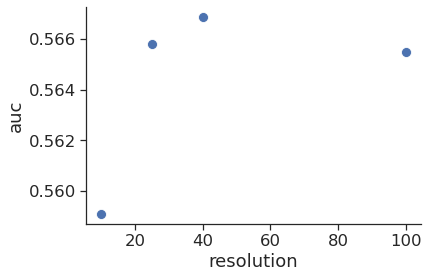

In [23]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in ['sub_compartments/inter_only/hic_gene_1_percent_1.csv', 'sub_compartments/inter_only/hic_gene_1_percent_1.csv', 'sub_compartments/inter_only/hic_gene_1_percent_2.csv', 'sub_compartments/inter_only/hic_gene_1_percent_all.csv', 'compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv']:
                                    #performance_type = 'sub_compartments/intra_only/hic_gene_1_percent_1.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution', 'pairs'])['auc'].mean())

        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in ['aggragates']:
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['inter_only/hic_gene_none_inter_1_percent_per_chr.csv']:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type', 'pairs'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments/intra_only/hic_gene_1_percent_1_1000000_random.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_1000000_random.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments_aggregates/intra_only/hic_gene_1_percent_1.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments_aggregates/intra_only/hic_gene_1_percent_2.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/sub_compartments_aggregates/intra_only/hic_gene_1_percent_all.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/comp

ValueError: No objects to concatenate

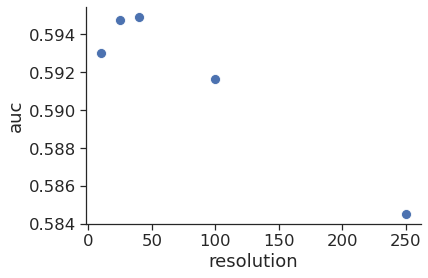

In [36]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in ['topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv', 'sub_compartments/intra_only/hic_gene_1_percent_1_1000000_random.csv','sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_1000000_random.csv','sub_compartments_aggregates/intra_only/hic_gene_1_percent_1.csv', 'sub_compartments_aggregates/intra_only/hic_gene_1_percent_2.csv', 'sub_compartments_aggregates/intra_only/hic_gene_1_percent_all.csv', 'compartment/intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv']:
                                    #performance_type = 'sub_compartments/intra_only/hic_gene_1_percent_1.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution', 'pairs'])['auc'].mean())

        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr.csv']


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in ['aggragates']:
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['inter_only/hic_gene_none_inter_1_percent_per_chr.csv']:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type', 'pairs'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


In [29]:
    #pearson correlation

    species_list = ['human']
    if species_list == ['human']:
        color_1 = '#98DBF6'
        color_2 = '#00A5E6'
    elif species_list == ['mouse']:
        color_1 = '#F69398'
        color_2 = '#E83B43'
    else:
        color_1 = '#E9DBC4'
        color_2 = '#EC9200'        
    
    res_list = [10, 25, 40, 100, 500]
    #res_list = [10]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    #performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']
    performance_type_list = ['inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv']
    
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in ['human']: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type, agg_type in zip(['/spr/0/all_bins/KR_KR/inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv', '/spr/0/all_bins/KR_KR/inter_only/hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv'], ['spearman', 'pcc']):

                                file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                try:


                                    df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                    df2['species'] = species
                                    df2['resolution'] = resolution
                                    df2['mapping'] = mapping
                                    df2['coef'] = coef
                                    df2['bin_type'] = bin_type
                                    df2['percentile'] = percentile
                                    df2['KR_type'] = KR_type
                                    df2['pairs'] = performance_type
                                    df2['coexp_percentile'] = gene_percentile
                                    df2['agg_type'] = agg_type
                                    df2['proj'] = 'all'
                                    df2['edge_type'] = ''
                                    empty_list.append(df2)
                                except:
                                    continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
    print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())
    
    
    counter = 0
    performance_type_list = ['inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv']
    for species in species_list: 
        contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []

        for proj in df_con['id'].tolist() :
              counter = counter + 1
              

              #for species in ['drosophila', 'drosophila', 'drosophila']: 

              #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
              for bin_type in ['all_bins']: 
                for resolution in res_list:
                    for coef in ['jac_sim']:
                    #for coef in ['pcc', 'jac_sim']:
                      #for mapping in ['tss']:
                      for mapping in ['max/spr/0/all_bins/KR_KR']:
                        #print (proj)
                        for percentile in ['90']:
                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                #for performance_type in ['intra_only', 'inter_only', 'all']:
                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'


                                    #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        #df2['inp_file'] = inp_file
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['proj'] = proj
                                        df2['pairs'] = performance_type
                                        df2['agg_type'] = 'proj_agg'
                                        #print (proj)
                                        
                                        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                        df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                    except:
                                        #print (f'{file_path}/{file_name}')
                                        print (counter, proj, resolution)
                                        
                                        continue


                                    empty_list.append(df2)
    df_ind=pd.concat(empty_list)

    df = pd.concat([df_whole_agg, df_ind])

    dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
        df_seq_depth['species'] = species
        df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
        df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
        #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

    import numpy as np
    dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

    dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
    dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
    dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

    dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
    
    #dk = dk[dk['auc'] > 0.5]
    #dk = dk[dk['agg_type']=='proj_agg']
    #print (dk)
    
    
    
    

    sc_bar = sns.scatterplot(data=dk[dk['resolution']==40], x='log_contacts', y='auc', style='agg_type', color=color_1,edgecolor="black", s=100, linewidth=1.2, markers =  {"proj_agg": "*", "pearson": "o", "spearman": "^"})
    sc_bar.legend().remove()
    #sc_bar = sns.scatterplot(data=dk[dk['resolution']==100], x='log_contacts', y='auc')
    #dk['log_contacts'] = dk['log_contacts'].round(0)
    sc_bar = sns.lineplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc')
    
    sc_bar = sns.regplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc')
    #sc_bar.set(ylim=(0.5, 0.67))
    plt.plot()
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_inter.pdf',
    #        transparent=True)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)
    axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v")
    #for i, patch in enumerate(axb.artists):
        # Boxes from left to right

     #   patch.set_hatch('//')
    #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='pearson'], ax=ax, size=10, color=color_2, orient="v")
    sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='spearman'], ax=ax, size=10, color="green", orient="v")
    #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
    #ax.set(ylim=(0.5, 0.67))
    plt.plot()
    
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_inter.pdf',
    #        transparent=True)


resolution  agg_type
10          pcc         0.697335
            spearman    0.674487
40          pcc         0.698893
            spearman    0.634463
100         spearman    0.625350
500         pcc         0.611370
            spearman    0.608516
Name: auc, dtype: float64
1 SRP105082 25
2 SRP012412 25
3 SRP118999 25
4 SRP050102 25
5 SRP117084 25
6 SRP152979 25
7 SRP115572 25
8 SRP216194 25
9 SRP108500 25
10 SRP212226 25
11 SRP131871 25
12 SRP218691 25
13 SRP149906 25
14 SRP094854 25
15 SRP221518 25
16 SRP141473 25
17 SRP267107 25
18 SRP234897 25
19 SRP154953 25
20 SRP133031 25
21 SRP234115 25
22 SRP152879 25
23 SRP115913 25
24 SRP224133 25
25 SRP165933 25
26 SRP114754 25
27 SRP173234 25
28 SRP106379 25
29 SRP239849 25
30 SRP160101 25
31 SRP250333 25
32 SRP233368 25
33 SRP199225 25
34 SRP157799 25
35 SRP168606 25
36 SRP162098 25
37 SRP131003 25
38 SRP120957 25
39 SRP106040 25
40 SRP186012 25
41 ERP107279 25
42 SRP212073 25
43 SRP194362 25
44 SRP170743 25
45 SRP150629 25
46 SRP13579

<ipython-input-29-2fb0da52b885>:147: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-29-2fb0da52b885>:160: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


ValueError: These `markers` levels are missing values: {'pcc'}

/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_123_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_continous_rank_diff_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_all_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_2_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartment

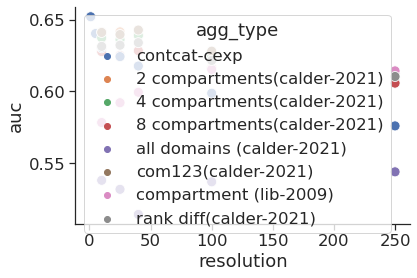

In [154]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [1,5, 10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'com123(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_123_proab.csv', 'rank diff(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_continous_rank_diff_proab.csv','all domains (calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_all_proab.csv','2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_3_proab.csv','compartment (lib-2009)':'compartment/intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', 'contcat-cexp': 'max/intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'}

        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_2_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_3_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//5kbp_raw/topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//5kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi

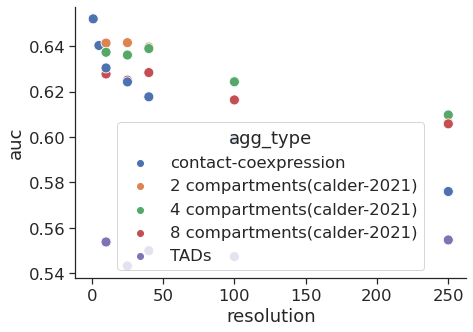

In [312]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [1,5, 10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'TADs':'topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv','2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_3_proab.csv', 'contact-coexpression': 'max/intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'}

        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



here
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/compartment/intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
here
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv
here
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv
here
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_2_proab.csv
here
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_3_proab.csv
here
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//5kbp_raw/compartment/intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
here


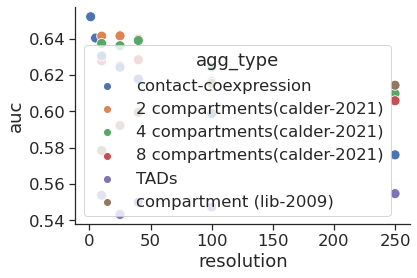

In [19]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [1,5, 10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'compartment (lib-2009)':'compartment/intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', 'TADs':'topdom_aggregates/intra_only/gw_tad_sim_1_percent.csv','2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/intra_only/hic_gene_1_percent_3_proab.csv', 'contact-coexpression': 'max/intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'}

        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['pairs'] = performance_type
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print ("here")
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



In [16]:
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['pairs'] = performance_type
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''

In [313]:
df_whole_agg[df_whole_agg['resolution'] == 1]

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file  \
0      ENSG00000131788          chr1  ENSG00000131788           chr1   
1      ENSG00000066294          chr1  ENSG00000066294           chr1   
2      ENSG00000230806          chr1  ENSG00000230806           chr1   
3      ENSG00000143816          chr1  ENSG00000143816           chr1   
4      ENSG00000231073          chr1  ENSG00000231073           chr1   
...                ...           ...              ...            ...   
23460  ENSG00000184979         chr22  ENSG00000184979          chr22   
23461  ENSG00000100038         chr22  ENSG00000100038          chr22   
23462  ENSG00000099968         chr22  ENSG00000099968          chr22   
23463  ENSG00000185386         chr22  ENSG00000185386          chr22   
23464  ENSG00000100321         chr22  ENSG00000100321          chr22   

            auc species  resolution mapping     coef  bin_type  percentile  \
0      0.659423   human           1     max  jac_sim  all_bins          90   
1      0.731932   human           1     max  jac_sim  all_bins          90   
2      0.804628   human           1     max  jac_sim  all_bins          90   
3      0.638032   human           1     max  jac_sim  all_bins          90   
4      0.573363   human           1     max  jac_sim  all_bins          90   
...         ...     ...         ...     ...      ...       ...         ...   
23460  0.469697   human           1     max  jac_sim  all_bins          90   
23461  0.817220   human           1     max  jac_sim  all_bins          90   
23462  0.717532   human           1     max  jac_sim  all_bins          90   
23463  0.709957   human           1     max  jac_sim  all_bins          90   
23464  0.602934   human           1     max  jac_sim  all_bins          90   

         KR_type                                              pairs  \
0      KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
1      KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
2      KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
3      KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
4      KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
...          ...                                                ...   
23460  KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
23461  KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
23462  KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
23463  KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   
23464  KR_ranked  max/intra_only/hic_gene_KR_intra_1_percent_per...   

       coexp_percentile              agg_type proj edge_type  counts_inter  
0                     1  contact-coexpression  all             96455324722  
1                     1  contact-coexpression  all             96455324722  
2                     1  contact-coexpression  all             96455324722  
3                     1  contact-coexpression  all             96455324722  
4                     1  contact-coexpression  all             96455324722  
...                 ...                   ...  ...       ...           ...  
23460                 1  contact-coexpression  all             96455324722  
23461                 1  contact-coexpression  all             96455324722  
23462                 1  contact-coexpression  all             96455324722  
23463                 1  contact-coexpression  all             96455324722  
23464                 1  contact-coexpression  all             96455324722  

[23465 rows x 18 columns]

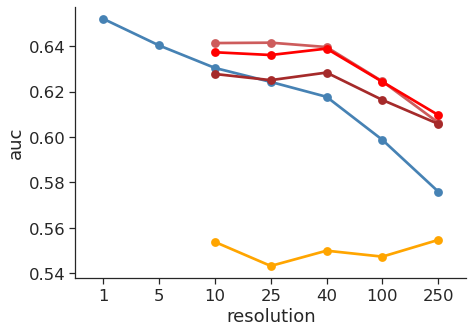

In [314]:
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="scatter", lw=5, aspect = 1.2, palette = ['steelblue', 'indianred', 'red', 'brown', 'orange' ]
)
ax.legend().remove()

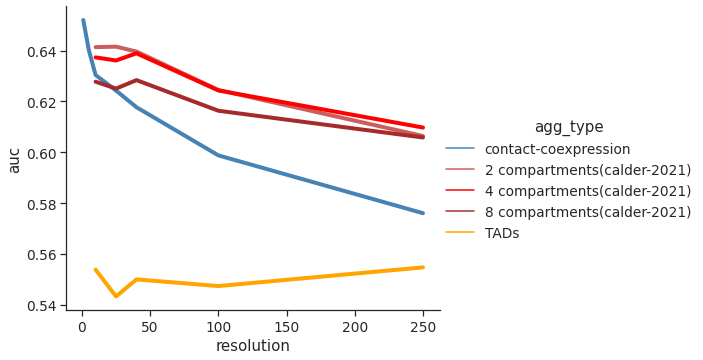

In [214]:
sns.relplot(
    data=tmp_df, x="resolution", y="auc",
     hue="agg_type",
    kind="line", lw=4, aspect=1.3,palette = ['steelblue', 'indianred', 'red', 'brown', 'orange' ]
)

/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw//sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1_proab.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/sub_compartments/inter_only/hic_gene_1_percent_1.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/sub_compartments_aggregate/inter_only/hic_gene_1_percent_123_random.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/sub_compartments_aggregate/inter_only/hic_gene_1_percent_12_random.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//1kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates

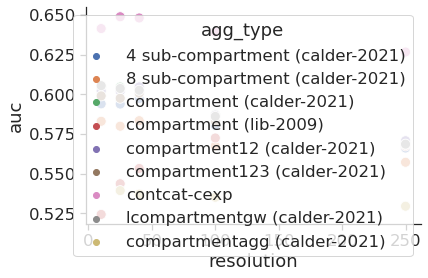

In [141]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [1,5, 10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'lcompartmentgw (calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1_proab.csv', 'compartmentagg (calder-2021)':'sub_compartments/inter_only/hic_gene_1_percent_1.csv', 'compartment123 (calder-2021)':'sub_compartments_aggregate/inter_only/hic_gene_1_percent_123_random.csv', 'compartment12 (calder-2021)':'sub_compartments_aggregate/inter_only/hic_gene_1_percent_12_random.csv', 'compartment (calder-2021)':'sub_compartments_aggregate/inter_only/hic_gene_1_percent_1.csv', 'compartment (lib-2009)':'compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', '4 sub-compartment (calder-2021)': 'sub_compartments_aggregate/inter_only/hic_gene_1_percent_2.csv', '8 sub-compartment (calder-2021)': 'sub_compartments_aggregate/inter_only/hic_gene_1_percent_3.csv', 'contcat-cexp': 'max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv'}
        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



resolution  agg_type                   
10          2 compartments(calder-2021)    0.605450
            4 compartments(calder-2021)    0.594280
            8 compartments(calder-2021)    0.583042
            all domains (calder-2021)      0.497812
            com123(calder-2021)            0.599433
            compartment (lib-2009)         0.524234
            contcat-cexp                   0.641485
            rank diff(calder-2021)         0.586849
25          2 compartments(calder-2021)    0.603672
            4 compartments(calder-2021)    0.593218
            8 compartments(calder-2021)    0.579413
            all domains (calder-2021)      0.495995
            com123(calder-2021)            0.596815
            compartment (lib-2009)         0.543593
            contcat-cexp                   0.648939
            rank diff(calder-2021)         0.587484
40          2 compartments(calder-2021)    0.602552
            4 compartments(calder-2021)    0.596652
            8 compartmen

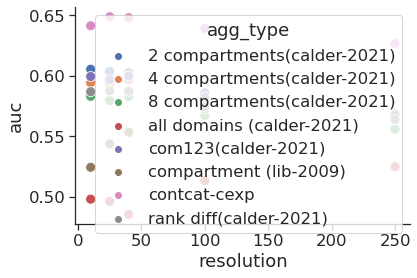

In [152]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'com123(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_123_proab.csv', 'rank diff(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_continous_rank_diff_proab.csv','all domains (calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_all_proab.csv','2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_3_proab.csv','compartment (lib-2009)':'compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', 'contcat-cexp': 'max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv'}


        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



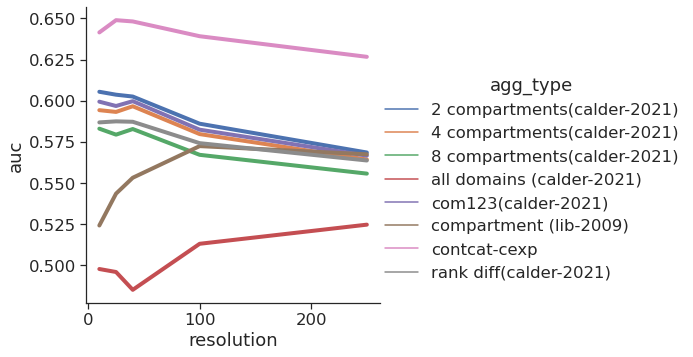

In [153]:
sns.relplot(
    data=tmp_df, x="resolution", y="auc",
     hue="agg_type",
    kind="line", lw=4, aspect = 1.2
)

In [ ]:
performance_list_dict = {'rank diff(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_continous_rank_diff_proab_proab.csv','all domains (calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_all_proab.csv','2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_3_proab.csv','compartment (lib-2009)':'compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', 'contcat-cexp': 'max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv'}




resolution  agg_type                   
10          2 compartments(calder-2021)    0.605450
            4 compartments(calder-2021)    0.594280
            8 compartments(calder-2021)    0.583042
            compartment (lib-2009)         0.524234
            contact-coexpression           0.641485
25          2 compartments(calder-2021)    0.603672
            4 compartments(calder-2021)    0.593218
            8 compartments(calder-2021)    0.579413
            compartment (lib-2009)         0.543593
            contact-coexpression           0.648939
40          2 compartments(calder-2021)    0.602552
            4 compartments(calder-2021)    0.596652
            8 compartments(calder-2021)    0.582821
            compartment (lib-2009)         0.553236
            contact-coexpression           0.648162
100         2 compartments(calder-2021)    0.586055
            4 compartments(calder-2021)    0.579753
            8 compartments(calder-2021)    0.567159
            compartment 

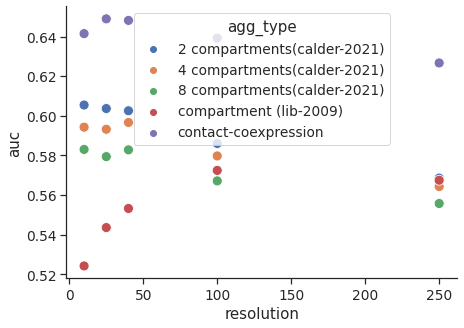

In [215]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_3_proab.csv','compartment (lib-2009)':'compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', 'contact-coexpression': 'max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv'}


        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



resolution  agg_type                   
10          2 compartments(calder-2021)    0.605450
            4 compartments(calder-2021)    0.594280
            8 compartments(calder-2021)    0.583042
            compartment (lib-2009)         0.524234
            contact-coexpression           0.641485
25          2 compartments(calder-2021)    0.603672
            4 compartments(calder-2021)    0.593218
            8 compartments(calder-2021)    0.579413
            compartment (lib-2009)         0.543593
            contact-coexpression           0.648939
40          2 compartments(calder-2021)    0.602552
            4 compartments(calder-2021)    0.596652
            8 compartments(calder-2021)    0.582821
            compartment (lib-2009)         0.553236
            contact-coexpression           0.648162
100         2 compartments(calder-2021)    0.586055
            4 compartments(calder-2021)    0.579753
            8 compartments(calder-2021)    0.567159
            compartment 

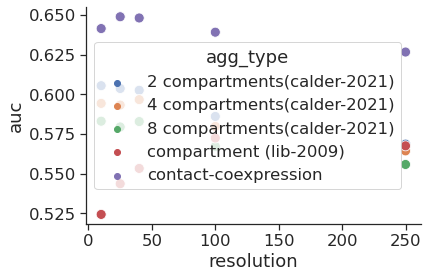

In [18]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250]
        #res_list = [25]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []
        
        performance_list_dict = {'2 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_1_proab.csv' , '4 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_2_proab.csv', '8 compartments(calder-2021)':'/sub_compartments/sub_compartments_aggregate/inter_only/hic_gene_1_percent_3_proab.csv','compartment (lib-2009)':'compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv', 'contact-coexpression': 'max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv'}


        for resolution in res_list :
            for key, performance_type in performance_list_dict.items():

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{performance_type}'
                                    

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution

                                        df2['pairs'] = performance_type

                                        df2['agg_type'] = key
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        print (f'{file_path}/{file_name}')
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_df = df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_df, x='resolution', y='auc', s=100, hue='agg_type')
        print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())



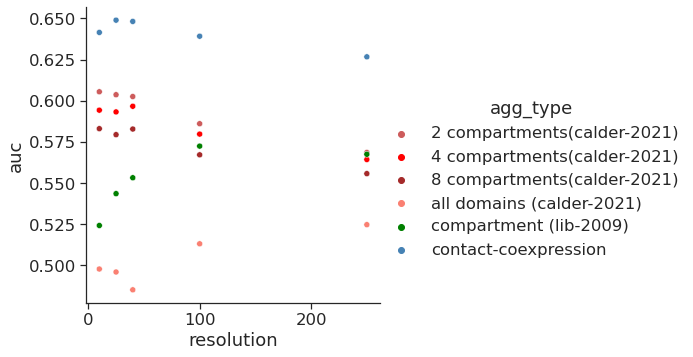

In [177]:
sns.relplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="scatter", lw=4, aspect = 1.2, palette = ['indianred', 'red', 'brown', 'salmon', 'green', 'steelblue']
)

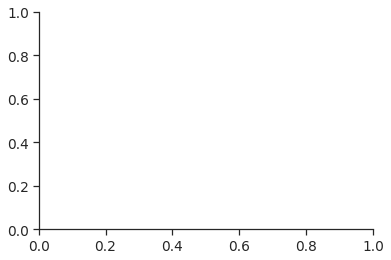

In [21]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
from matplotlib import rcParams
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 5,6

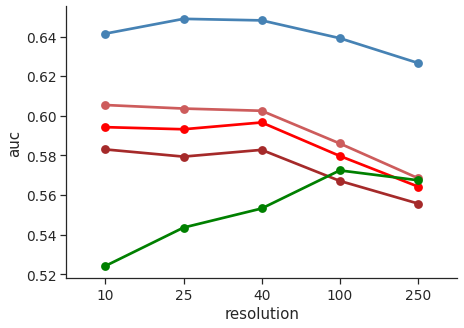

In [206]:
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="scatter", lw=5, aspect = 1.2, palette = ['indianred', 'red', 'brown', 'green', 'steelblue']
)
ax.legend().remove()

In [218]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

In [ ]:
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dt[dt['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        axb.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
        axb.yaxis.set_major_formatter(ticker.ScalarFormatter())
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        axb.set(ylim=(0.49, ylim2 ))
        ax = sns.swarmplot(x='resolution', y='auc', data=dt[dt['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='dimgrey', linewidth=2,marker='o', order=reversed_list)
        ax = sns.swarmplot(x='resolution', y='auc', data=dt[dt['agg_type']=='meta'], ax=ax, size=10, color='dimgrey', edgecolor='dimgrey', linewidth=0.5,marker='$/$', order=reversed_list)           
        #sns.swarmplot(x='resolution', y='auc', data=dt[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        #ax.set(ylim=(0.49, ylim2 ))
        #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
        #ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


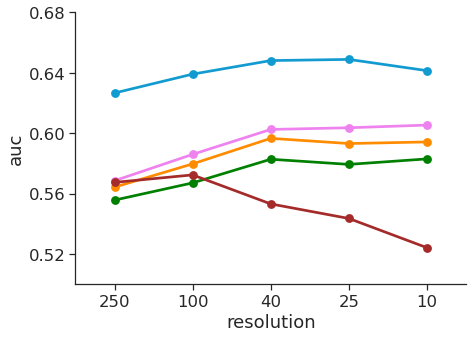

In [311]:
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",style="agg_type",
    kind="scatter", s=[20,0.2,0.2,0.2,3], aspect = 1.2, palette = ['violet', 'darkorange', 'green', 'brown', '#129BD1'], order=reversed_list, size=30
)
ax.legend().remove()
ax.set(ylim=(0.50, 0.68 ))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_compartment_subcompartment.pdf', transparent=True, bbox_inches='tight')


In [ ]:
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="scatter", lw=5, aspect = 1.2, palette = ['steelblue', 'indianred', 'red', 'brown', 'orange' ]
)
ax.legend().remove()

In [1]:
a

NameError: name 'a' is not defined

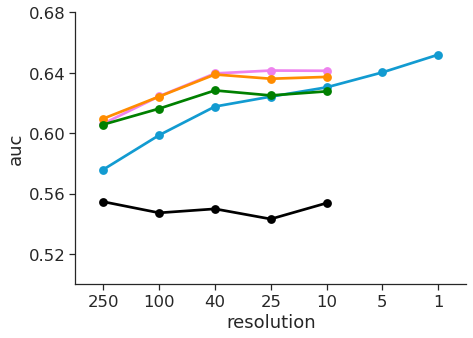

In [318]:
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",style="agg_type",
    kind="scatter", s=[20,0.2,0.2,0.2,3], aspect = 1.2, palette = ['#129BD1', 'violet', 'darkorange', 'green', 'black'], order=reversed_list, size=30
)
ax.legend().remove()
ax.set(ylim=(0.50, 0.68 ))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_compartment_subcompartment_tad.pdf', transparent=True, bbox_inches='tight')


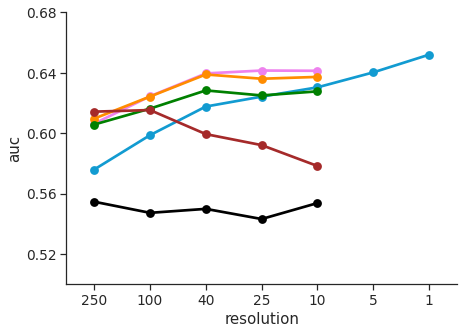

In [24]:
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",style="agg_type",
    kind="scatter", s=[20,0.2,0.2,0.2,3], aspect = 1.2, palette = ['#129BD1', 'violet', 'darkorange', 'green', 'black', 'brown'], order=reversed_list, size=30
)
ax.legend().remove()
ax.set(ylim=(0.50, 0.68 ))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_compartment_subcompartment_tad.pdf', transparent=True, bbox_inches='tight')


In [247]:
tmp_df[tmp_df["agg_type"]!=]

resolution                     agg_type       auc
0           10  2 compartments(calder-2021)  0.605450
1           10  4 compartments(calder-2021)  0.594280
2           10  8 compartments(calder-2021)  0.583042
4           10         contact-coexpression  0.641485
5           25  2 compartments(calder-2021)  0.603672
6           25  4 compartments(calder-2021)  0.593218
7           25  8 compartments(calder-2021)  0.579413
9           25         contact-coexpression  0.648939
10          40  2 compartments(calder-2021)  0.602552
11          40  4 compartments(calder-2021)  0.596652
12          40  8 compartments(calder-2021)  0.582821
14          40         contact-coexpression  0.648162
15         100  2 compartments(calder-2021)  0.586055
16         100  4 compartments(calder-2021)  0.579753
17         100  8 compartments(calder-2021)  0.567159
19         100         contact-coexpression  0.639190
20         250  2 compartments(calder-2021)  0.568571
21         250  4 compartments(calder-2021)  0.564321
22         250  8 compartments(calder-2021)  0.555747
24         250         contact-coexpression  0.626679

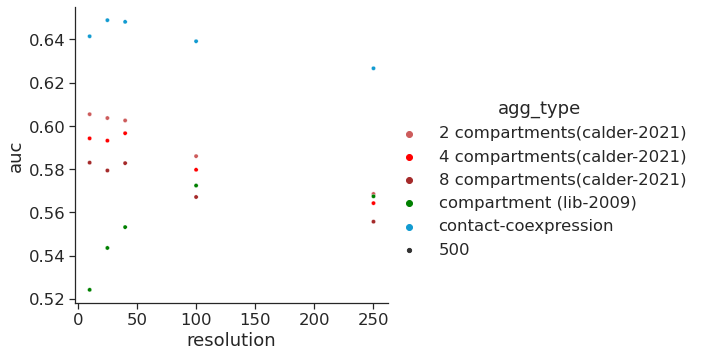

In [244]:
sns.relplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="scatter", lw=5, aspect = 1.2, palette = ['indianred', 'red', 'brown', 'green', '#129BD1'], size=500
    
)

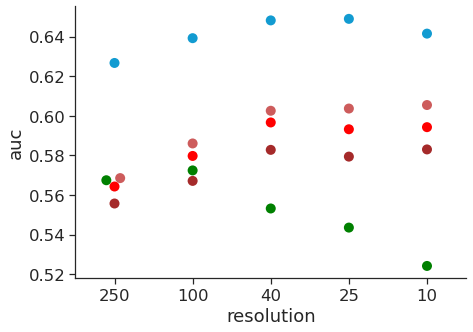

In [239]:
rcParams['figure.figsize'] = 7,5
ax = sns.swarmplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    lw=5, palette = ['indianred', 'red', 'brown', 'green', '#129BD1'], order=reversed_list, s=100
)
ax.legend().remove()

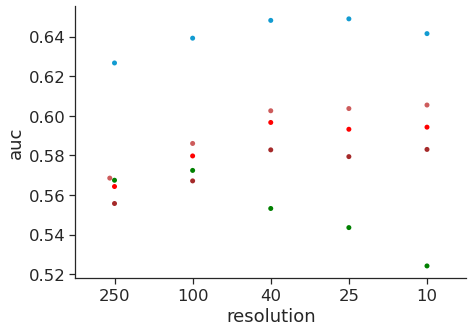

In [231]:
rcParams['figure.figsize'] = 7,5
ax = sns.swarmplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    lw=5, palette = ['indianred', 'red', 'brown', 'green', '#129BD1'], order=reversed_list
)
ax.legend().remove()

AttributeError: 'Line2D' object has no property 'order'

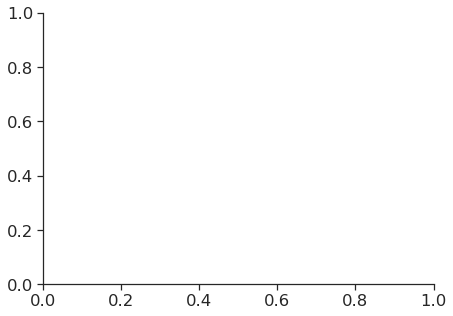

In [232]:
rcParams['figure.figsize'] = 7,5
ax = sns.lineplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    lw=5, palette = ['indianred', 'red', 'brown', 'green', '#129BD1'], order=reversed_list
)
ax.legend().remove()

In [221]:
rcParams['figure.figsize'] = 7,5
ax = sns.pointplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="scatter", lw=5, aspect = 1.2, palette = ['indianred', 'red', 'brown', 'green', '#129BD1', order=reversed_list]
)
ax.legend().remove()


SyntaxError: invalid syntax (<ipython-input-221-4b44c99725aa>, line 4)

TypeError: 'Legend' object is not callable

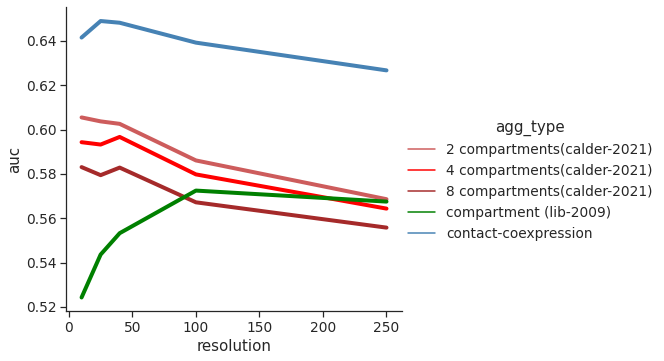

In [204]:
rcParams['figure.figsize'] = 7,5
ax = sns.relplot(
    data=tmp_df, x="resolution", y="auc", hue="agg_type",
    kind="line", lw=4, aspect = 1.2, palette = ['indianred', 'red', 'brown', 'green', 'steelblue']
)
ax.legend().remove()

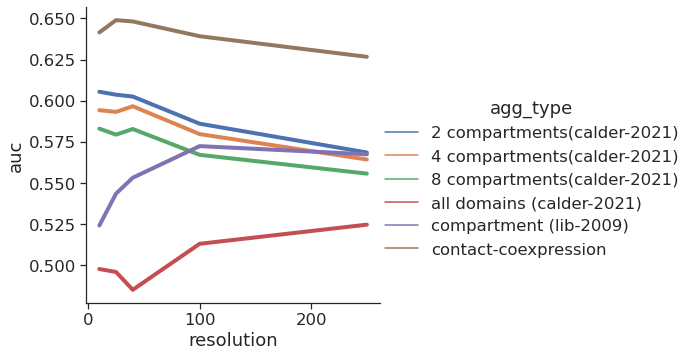

In [167]:
sns.relplot(
    data=tmp_df, x="resolution", y="auc",
     hue="agg_type",
    kind="line", lw=4, aspect = 1.2
)